<hr style="height: 3px; background-color: black;">

# Practical Part A 
Use the Lab2_dataset.csv provided. Your target in this part will be classify texts into Spam vs Not Spam using the Naive Bayes algorithms and comparing them to another type of classification model and comment on the results.

### Reading the Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Lab2_dataset.csv")

df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


<hr style="height: 3px; background-color: black;">

### Vectorizing the Data

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the text data and transform the "text" feature
X = vectorizer.fit_transform(df['text'])

# Print the shape of the transformed data
print("Shape of the transformed data:", X.shape)


Shape of the transformed data: (5171, 50447)


<hr style="height: 3px; background-color: black;">

### Splitting the Dataset 

In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target labels (y)
X = df['text']
y = df['label']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4136,)
Shape of X_test: (1035,)
Shape of y_train: (4136,)
Shape of y_test: (1035,)


<hr style="height: 3px; background-color: black;">

### Training the Models:
<b>

- RandomForestClassifier

- Gaussian Naive Bayes Classifiers

- Multinomial Naive Bayes Classifiers
</b>

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Vectorizing data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initializing the Classifiers
rf_classifier = RandomForestClassifier(random_state=42)
gnb_classifier = GaussianNB()
mnb_classifier = MultinomialNB()

# Train, Predict, Evaluate
rf_classifier.fit(X_train_vectorized, y_train)
y_pred = rf_classifier.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier:")
print("Accuracy:", accuracy)
print("Classification Report:", classification_report(y_test, y_pred))

# Train, Predict, Evaluate Gaussian Naive Bayes
gnb_classifier.fit(X_train_vectorized.toarray(), y_train)
y_pred_gnb = gnb_classifier.predict(X_test_vectorized.toarray())
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("\nGaussian Naive Bayes Classifier:")
print("Accuracy:", accuracy_gnb)
print("Classification Report:", classification_report(y_test, y_pred_gnb))

# Train, Predict, Evaluate Multinomial Naive Bayes
mnb_classifier.fit(X_train_vectorized, y_train)
y_pred_mnb = mnb_classifier.predict(X_test_vectorized)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print("\nMultinomial Naive Bayes Classifier:")
print("Accuracy:", accuracy_mnb)
print("Classification Report:", classification_report(y_test, y_pred_mnb))



Random Forest Classifier:
Accuracy: 0.970048309178744
Classification Report:               precision    recall  f1-score   support

         ham       0.97      0.98      0.98       742
        spam       0.96      0.94      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035


Gaussian Naive Bayes Classifier:
Accuracy: 0.9545893719806763
Classification Report:               precision    recall  f1-score   support

         ham       0.95      0.99      0.97       742
        spam       0.96      0.87      0.92       293

    accuracy                           0.95      1035
   macro avg       0.96      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035


Multinomial Naive Bayes Classifier:
Accuracy: 0.9719806763285024
Classification Report:               precision    recall  f1-score   support

         ham       0.98      0.98      

<hr style="height: 3px; background-color: black;">

### Testing the Predictions

In [18]:
# Sample text data for prediction
samples = [
    "Claim your prize now.",
    "Reminder: Your appointment is scheduled for tomorrow at 2 PM.",
    "URGENT: Your account needs verification.",
    "Hi, Let's catch up soon.",
    "Limited time offer",
]

# Vectorize the sample data
samples_vectorized = vectorizer.transform(samples)

#  Random Forest classifier
rf_predictions = rf_classifier.predict(samples_vectorized)

# Multinomial Naive Bayes classifier
mnb_predictions = mnb_classifier.predict(samples_vectorized)

# Gaussian Naive Bayes classifier
gnb_predictions = gnb_classifier.predict(samples_vectorized.toarray())


print("Random Forest Classifier Predictions:")
for sample, prediction in zip(samples, rf_predictions):
    print(f"{sample} -> {'Spam' if prediction == 1 else 'Not Spam'}")

print("\nMultinomial Naive Bayes Classifier Predictions:")
for sample, prediction in zip(samples, mnb_predictions):
    print(f"{sample} -> {'Spam' if prediction == 1 else 'Not Spam'}")

print("\nGaussian Naive Bayes Classifier Predictions:")
for sample, prediction in zip(samples, gnb_predictions):
    print(f"{sample} -> {'Spam' if prediction == 1 else 'Not Spam'}")


Random Forest Classifier Predictions:
Claim your prize now. -> Not Spam
Reminder: Your appointment is scheduled for tomorrow at 2 PM. -> Not Spam
URGENT: Your account needs verification. -> Not Spam
Hi, Let's catch up soon. -> Not Spam
Limited time offer -> Not Spam

Multinomial Naive Bayes Classifier Predictions:
Claim your prize now. -> Not Spam
Reminder: Your appointment is scheduled for tomorrow at 2 PM. -> Not Spam
URGENT: Your account needs verification. -> Not Spam
Hi, Let's catch up soon. -> Not Spam
Limited time offer -> Not Spam

Gaussian Naive Bayes Classifier Predictions:
Claim your prize now. -> Not Spam
Reminder: Your appointment is scheduled for tomorrow at 2 PM. -> Not Spam
URGENT: Your account needs verification. -> Not Spam
Hi, Let's catch up soon. -> Not Spam
Limited time offer -> Not Spam


- **Random Forest Classifier**:
  - Doesn't make any assumptions about the data distribution.
  - It utilizes ensemble learning with decision trees, capturing complex relationships without relying on specific data distributions. However, few misclassifications can still occur.

- **Gaussian Naive Bayes Classifier**:
  - It assumes that the  features follow a Gaussian (normal) distribution.
  - Naive Bayes is appropriate for continuous features but may not perform optimally for text data where this distribution assumption doesn't hold. Misclassifications are highly possible.

- **Multinomial Naive Bayes Classifier**:
  - Makes an assumption that the features follow a multinomial distribution.
  - This is specifically tailored for text classification tasks, suitable for discrete features like word counts. Despite its effectiveness in such tasks.

<hr style="height: 3px; background-color: black;">

### Conclusion:
- The Random Forest Classifier demonstrated the highest accuracy at 97.00%, showing balanced performance across both "ham" and "spam" classes. However, while both Naive Bayes classifiers achieved high accuracy (Gaussian: 95.46%, Multinomial: 97.20%), their precision, recall, and F1-scores varied slightly, possibly due to differences in their underlying assumptions.

- As currently any of the models do not provide any accurate answers, techniques like cross-validation, hyperparameter tuning, and model ensembling can help improve the model's accuracy and generalization ability.

<hr style="height: 3px; background-color: black;">

# Practical Part B 

### Reading Dataset

Use the AB_NYC_2019.csv dataset for this part.

In [19]:
nyc_data = pd.read_csv("./AB_NYC_2019.csv")
nyc_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<hr style="height: 3px; background-color: black;">

### Statistics

In [20]:
nyc_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<hr style="height: 3px; background-color: black;">

### Removing the Outliers

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nyc_data_len = nyc_data.shape[0]
nyc_data_1 = nyc_data
nyc_data_2 = nyc_data

# Define functions for outlier removal using Z-score and IQR
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[z_scores <= threshold]

def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

### Using Z Score

In [22]:
# Removing the Outliers
price_cleaned_zscore = remove_outliers_zscore(nyc_data['price'])
nyc_data_1 = price_cleaned_zscore.index

# Calculating the number
outliers_removed_zscore = len(nyc_data) - len(price_cleaned_zscore)
outliers_removed_zscore_p = (outliers_removed_zscore / nyc_data_len) * 100

print("Original dataset shape:", nyc_data.shape)
print("Number of outliers removed using Z-score approach:", outliers_removed_zscore, f"({outliers_removed_zscore_p:.2f}%)")
print("Number of rows left:", nyc_data_1.shape[0])


Original dataset shape: (48895, 16)
Number of outliers removed using Z-score approach: 388 (0.79%)
Number of rows left: 48507


In [23]:
# Removing the Outliers
price_cleaned_iqr = remove_outliers_iqr(nyc_data['price'])
nyc_data_2 = price_cleaned_iqr.index

# Calculating the number 
outliers_removed_iqr = len(nyc_data) - len(price_cleaned_iqr)
outliers_removed_iqr_p = (outliers_removed_iqr / nyc_data_len) * 100

print("Original dataset shape:", nyc_data.shape)
print("\nNumber of outliers removed using IQR (whiskers) approach:", outliers_removed_iqr, f"({outliers_removed_iqr_p:.2f}%)")
print("Number of rows left:", nyc_data_2.shape[0])

Original dataset shape: (48895, 16)

Number of outliers removed using IQR (whiskers) approach: 2972 (6.08%)
Number of rows left: 45923


<hr style="height: 3px; background-color: black;">

### Visualization

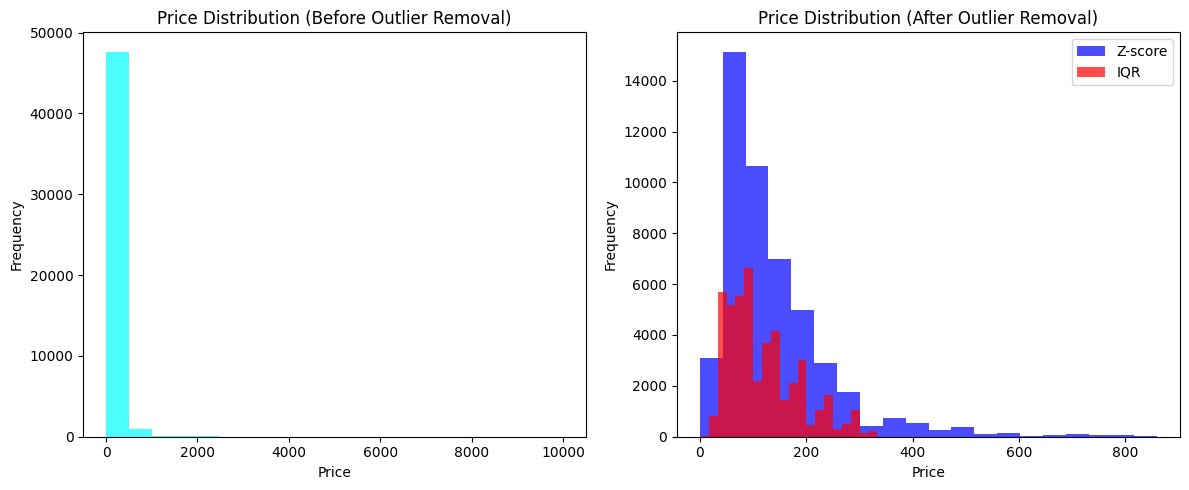

In [24]:
# Plot histograms for price distribution before and after removing outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(nyc_data['price'], bins=20, color='cyan', alpha=0.7)
plt.title('Price Distribution (Before Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(price_cleaned_zscore, bins=20, color='blue', alpha=0.7, label='Z-score')
plt.hist(price_cleaned_iqr, bins=20, color='red', alpha=0.7, label='IQR')
plt.title('Price Distribution (After Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

<hr style="height: 3px; background-color: black;">

### Conclusion:

- We can observe that after removal of the outliers, the data is more readable and clear, when compared to that of without removing the outliers. We can conclude that the outliers would have a huge impact on the trainned model on this dataset if this was not removed, as it would be biased.

- The dataset cleaned using the Z Score method removes 388 outliers (0.79%), while IQR approach removes 2972 outliers (6.08%) which affects the dataset as it's alot of data which might have meaning and represent actual data and not be outliers. To be sure about this further analysis and data cleaning is required.

- While the IQR method removes more number of outliers, for now we can be sure that the Z Score approach provides us with cleaner and meaningful dataset, without removing any real data, showcasing all the possible prices clearly.

<hr style="height: 3px; background-color: black;">